<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/19_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/수업/머신러닝/best-cnn-model.h5')

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [3]:
model.layers

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.023356592 0.24055265


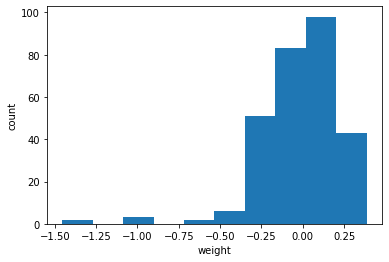

In [6]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

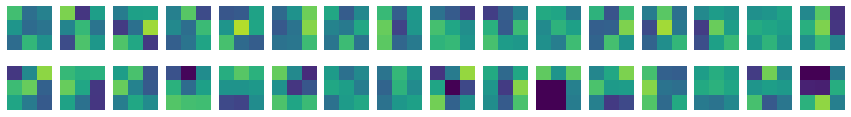

In [7]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [9]:
no_training_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [10]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [11]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0029447791 0.081545986


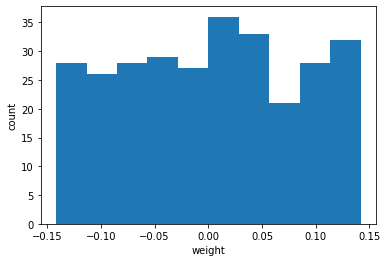

In [12]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

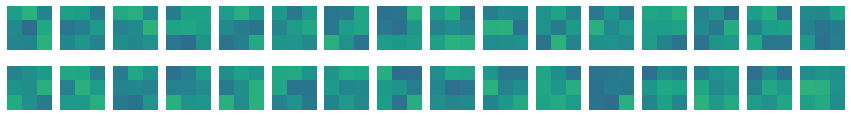

In [13]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [14]:
conv_acti = keras.Model(model.input, model.layers[0].output)
conv_acti

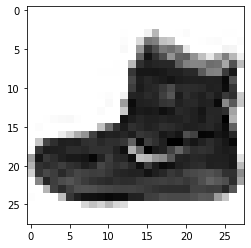

In [15]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [16]:
print(train_input.shape)
print(train_input[0].shape)
print(train_input[0:1].shape)

(60000, 28, 28)
(28, 28)
(1, 28, 28)


In [17]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 4s 4s/step


In [18]:
print(feature_maps.shape)

(1, 28, 28, 32)


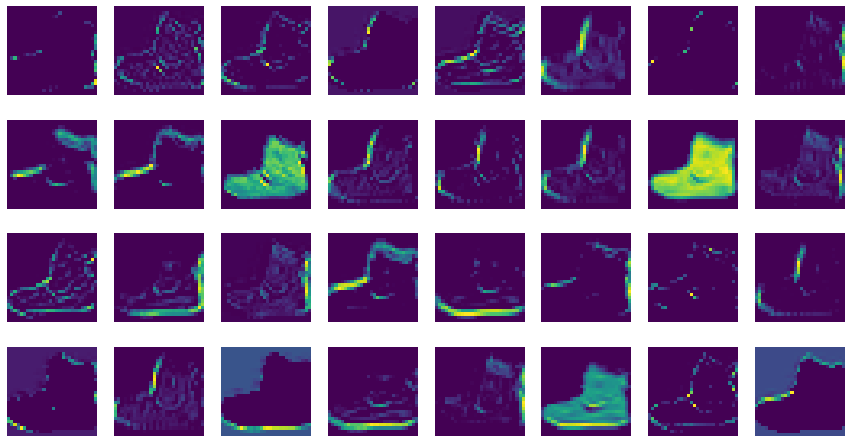

In [19]:
fig, axs = plt.subplots(4, 8, figsize = (15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [20]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
conv2_acti

In [21]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 119ms/step


In [22]:
print(feature_maps.shape)

(1, 14, 14, 64)


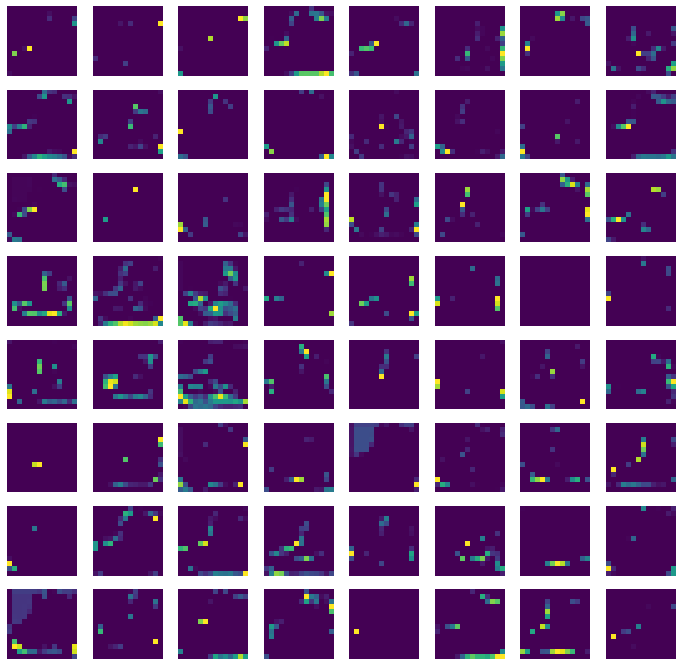

In [23]:
fig, axs = plt.subplots(8, 8, figsize = (12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()